# Projet de classification binaire avec réseau de neurones
## Réalisé par : **Achraf Elmssilha**

In [5]:
# Import des bibliothèques
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping




In [6]:
# données
data = datasets.load_breast_cancer()
X = data.data
y = data.target
# Normalisation 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Séparation train / test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)



In [7]:
# Construction du modèle optimisé
model = Sequential([
    Dense(64, input_shape=(X.shape[1],)),
    LeakyReLU(alpha=0.01),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compilation avec learning rate ajusté
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Callback pour éviter l’overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entraînement du modèle
history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=16,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=0
)




C:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(



 Accuracy sur le test set : 0.9561
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

Matrice de confusion :
[[41  1]
 [ 4 68]]


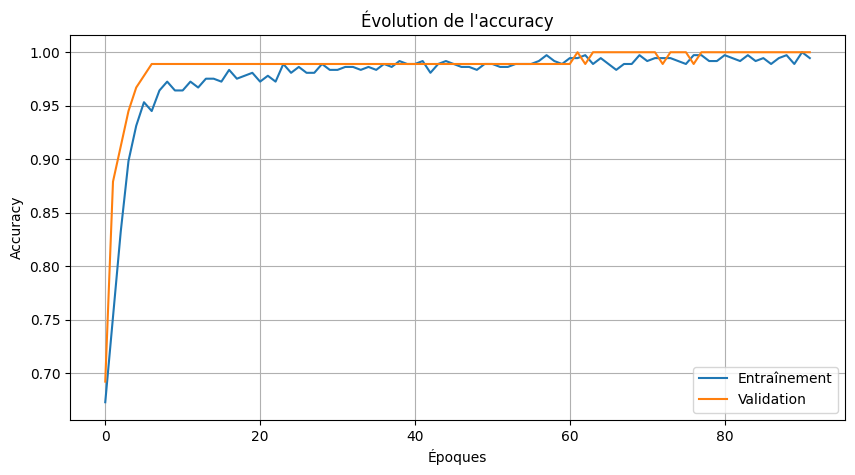

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

Matrice de confusion :
[[41  1]
 [ 4 68]]


In [10]:
# Évaluation du modèle
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\n Accuracy sur le test set : {accuracy:.4f}")

#   rapport
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("\nMatrice de confusion :")
print(confusion_matrix(y_test, y_pred))


# Courbes d'apprentissage
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Entraînement')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title("Évolution de l'accuracy")
plt.xlabel("Époques")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()
# Prédictions et rapport
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("\nMatrice de confusion :")
print(confusion_matrix(y_test, y_pred))




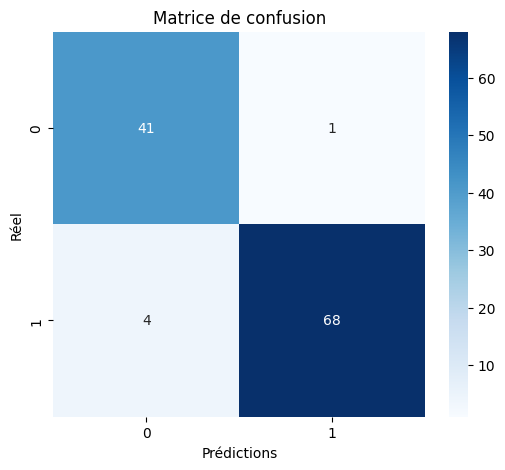

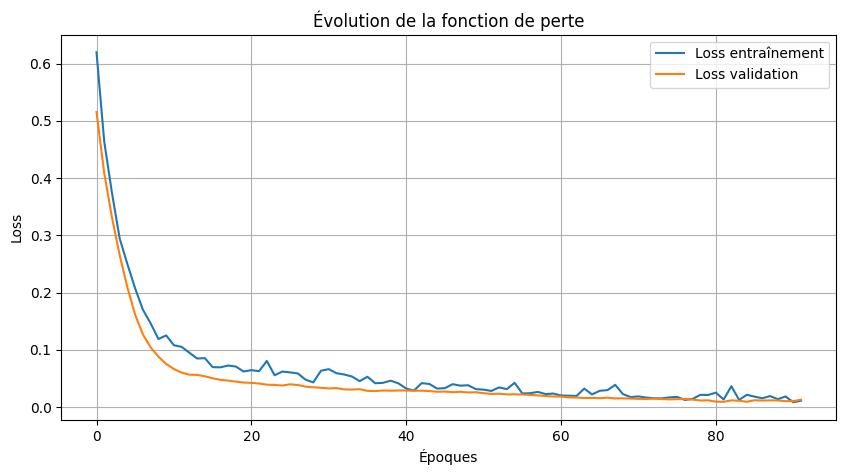


Exemple de prédictions :
     Réel  Prédit
3       1       0
21      0       0
58      0       0
113     1       1
91      1       1
28      1       1
32      1       1
79      1       1
15      1       1
42      1       1


In [11]:
# Matrice de confusion en graphique
import seaborn as sns
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues")
plt.title("Matrice de confusion")
plt.xlabel("Prédictions")
plt.ylabel("Réel")
plt.show()

# Courbe de la fonction de perte
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Loss entraînement')
plt.plot(history.history['val_loss'], label='Loss validation')
plt.title("Évolution de la fonction de perte")
plt.xlabel("Époques")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# prédictions
df_results = pd.DataFrame({
    "Réel": y_test,
    "Prédit": y_pred.flatten()
})
print("\nExemple de prédictions :")
print(df_results.sample(10))